# Decision Trees and Random Forests

### Problem Statement:
Predict next-day rain by training classification models on the target variable RainTomorrow.


We can read the data back preprocessed datasets for training, validation, and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors

In [1]:
import pandas as pd

In [2]:
train_inputs = pd.read_parquet('./data/train_inputs.parquet')
val_inputs = pd.read_parquet('./data/val_inputs.parquet')
test_inputs = pd.read_parquet('./data/test_inputs.parquet')

train_targets = pd.read_parquet('./data/train_targets.parquet')["RainTomorrow"]
val_targets = pd.read_parquet('./data/val_targets.parquet')["RainTomorrow"]
test_targets = pd.read_parquet('./data/test_targets.parquet')["RainTomorrow"]

In [3]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9788, 123)
train_targets: (9788,)
val_inputs: (1700, 123)
val_targets: (1700,)
test_inputs: (2591, 123)
test_targets: (2591,)


## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [6]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
126989,Walpole,0.437824,0.397959,0.031655,0.094322,0.534317,NW,0.190909,WNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40299,Williamtown,0.694301,0.932653,0.000000,0.168966,0.895105,WNW,0.427273,NNW,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28288,Richmond,0.634715,0.618367,0.000000,0.094322,0.534317,NNE,0.136364,None,NE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
134636,Launceston,0.287565,0.314286,0.021103,0.094322,0.534317,SSW,0.054545,None,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
130983,Hobart,0.297927,0.467347,0.000000,0.048276,0.272727,NW,0.390909,NNW,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,Tuggeranong,0.147668,0.373469,0.000000,0.094322,0.534317,W,0.209091,NW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
122446,Perth,0.461140,0.483673,0.000000,0.058621,0.223776,N,0.236364,N,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49288,Tuggeranong,0.386010,0.455102,0.002878,0.094322,0.534317,NNW,0.327273,NNW,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119280,PerthAirport,0.440415,0.538776,0.000000,0.082759,0.699301,NW,0.290909,NNE,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
import numpy as np

In [8]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [9]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [10]:
X_val

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
23480,0.595855,0.504082,0.000959,0.082759,0.517483,0.254545,0.292308,0.197368,0.666667,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77238,0.461140,0.412245,0.004796,0.003448,0.391608,0.290909,0.261538,0.263158,0.989583,0.757576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20541,0.712435,0.867347,0.000000,0.094322,0.534317,0.572727,0.461538,0.118421,0.468750,0.111111,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
57419,0.251295,0.226531,0.000000,0.094322,0.534317,0.218182,0.338462,0.289474,0.791667,0.757576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44800,0.567358,0.459184,0.254197,0.094322,0.534317,0.236364,0.200000,0.289474,0.927083,0.828283,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.321244,0.365306,0.000959,0.094322,0.534317,0.118182,0.000000,0.223684,1.000000,0.737374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5429,0.466321,0.673469,0.000000,0.094322,0.534317,0.154545,0.030769,0.144737,1.000000,0.383838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83338,0.256477,0.381633,0.000000,0.031034,0.363636,0.327273,0.061538,0.263158,0.677039,0.510673,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72707,0.305699,0.371429,0.006715,0.096552,0.076923,0.372727,0.138462,0.223684,0.739583,0.939394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, train_targets)

# An optimal decision tree has now been created using the training data.

DecisionTreeClassifier(random_state=42)

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [13]:
# returns the count of unique values in the `train_preds` variable.
# It creates a pandas Series object where the unique values in `train_preds` are the index and the corresponding counts are the values.
pd.value_counts(train_preds)

No     7599
Yes    2189
dtype: int64

The decision tree also returns probabilities for each prediction.

In [14]:
train_probability = model.predict_proba(X_train)
train_probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [15]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [16]:
model.score(X_val, val_targets)

0.8058823529411765

Although the training accuracy is 100%, the accuracy on the validation set is just about 80%, which is only marginally better then always predicting "No". 

In [17]:
val_targets.value_counts() / len(val_targets)

No     0.794118
Yes    0.205882
Name: RainTomorrow, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [18]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

[Text(0.5, 0.875, 'Humidity3pm <= 0.712\ngini = 0.347\nsamples = 9788\nvalue = [7599, 2189]'),
 Text(0.25, 0.625, 'Sunshine <= 0.528\ngini = 0.248\nsamples = 8194\nvalue = [7004, 1190]'),
 Text(0.125, 0.375, 'Pressure3pm <= 0.571\ngini = 0.415\nsamples = 1679\nvalue = [1186, 493]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.508\ngini = 0.191\nsamples = 6515\nvalue = [5818, 697]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.813\ngini = 0.468\nsamples = 1594\nvalue = [595, 999]'),
 Text(0.625, 0.375, 'Rainfall <= 0.013\ngini = 0.496\nsamples = 830\nvalue = [454, 376]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Temp9am <= 0.305\ngini = 0.301\nsamples = 764\nvalue = [141, 623]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

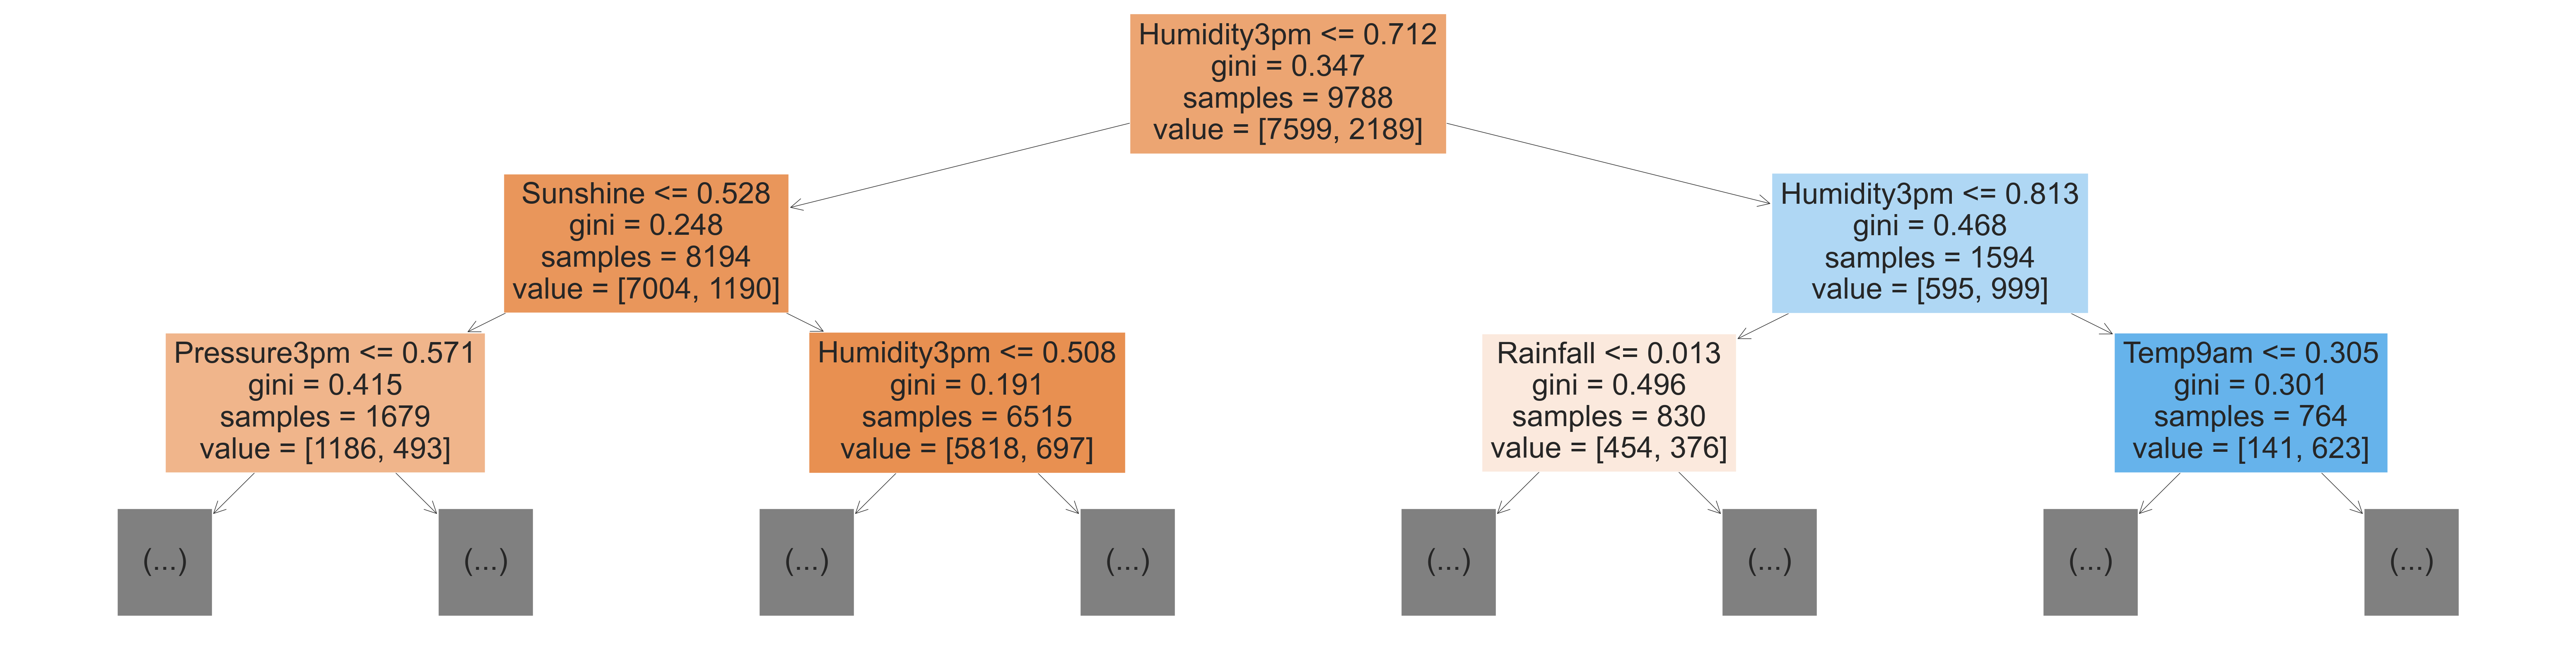

In [19]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= X_train.columns, max_depth=2, filled=True)

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. "Gini" is a selection criteria or tree splitting criteria. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. "A lower Gini index indicates a better split(result). among the available columns." A perfect split (only one class on each side) has a Gini index of 0. If there is 50-50 split then the criteria is least prefered by the model itself because it's a bad criteria.

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://i.imgur.com/tlYiXnp.png" width="480">


Let's check the depth of the tree that was created.

In [20]:
model.tree_.max_depth

30

We can also display the tree as text, which can be easier to follow for deeper trees.

In [21]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.71
|   |--- Sunshine <= 0.53
|   |   |--- Pressure3pm <= 0.57
|   |   |   |--- Humidity3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.33
|   |   |   |   |   |--- Location_Albany <= 0.50
|   |   |   |   |   |   |--- Sunshine <= 0.00
|   |   |   |   |   |   |   |--- WindDir3pm_N <= 0.50
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindDir3pm_N >  0.50
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Sunshine >  0.00
|   |   |   |   |   |   |   |--- WindDir3pm_nan <= 0.50
|   |   |   |   |   |   |   |   |--- WindSpeed9am <= 0.05
|   |   |   |   |   |   |   |   |   |--- WindDir3pm_NW <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- WindDir3pm_NW >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindSpeed9am >  0.05
|   |   |   |   |   |   |   |   |   |--- WindGustDir_NW <= 0.50
|   |   |   |   |  

##### Why Overfitting or 100% training accuracy?

The training accuracy is 100% because the decision tree has (our model) has literally memorized the entire training set in the form of this tree based structure.

And when it sees any example other than trainingor which doesn't fit exactly to the training, it tries to categorize it into one of the existing training examples by following one path of DT. That may or may not end up really well because it's going to ultimately boil down to a specific training example and doesn't generalize well to the examples it hasn't seen before.

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [22]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [23]:
model.feature_importances_

array([3.49257345e-02, 3.07937151e-02, 4.22748141e-02, 1.86728347e-02,
       5.44097237e-02, 5.15867301e-02, 2.12312331e-02, 2.87536812e-02,
       3.68257188e-02, 2.64559367e-01, 4.61709226e-02, 6.74395647e-02,
       1.73926170e-02, 1.25463339e-02, 3.30940709e-02, 2.81314210e-02,
       2.53636257e-03, 4.88594907e-03, 8.85196443e-05, 5.58347395e-04,
       2.17801237e-03, 1.72048150e-03, 1.79704909e-03, 8.80837628e-04,
       1.85616582e-03, 6.79028712e-04, 5.48664767e-04, 1.60682190e-03,
       3.36763438e-03, 7.65438990e-04, 1.33296623e-03, 1.76337264e-03,
       0.00000000e+00, 2.89718184e-03, 1.15398601e-03, 1.04335506e-03,
       1.42614666e-04, 9.47687991e-04, 8.43648412e-05, 2.30446882e-03,
       6.13116680e-04, 7.75828463e-04, 8.40861880e-04, 3.19148702e-03,
       2.03150657e-03, 1.95633156e-03, 8.01171026e-04, 5.46423397e-04,
       0.00000000e+00, 4.47298844e-03, 1.36814558e-03, 0.00000000e+00,
       1.17777289e-03, 1.32691363e-03, 1.41449744e-03, 1.08994330e-03,
      

Let's turn this into a dataframe and visualize the most important features.

In [24]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [25]:
importance_df

,feature,importance
9,Humidity3pm,0.264559
11,Pressure3pm,0.067440
4,Sunshine,0.054410
5,WindGustSpeed,0.051587
10,Pressure9am,0.046171
2,Rainfall,0.042275
8,Humidity9am,0.036826
0,MinTemp,0.034926
14,Temp9am,0.033094
1,MaxTemp,0.030794


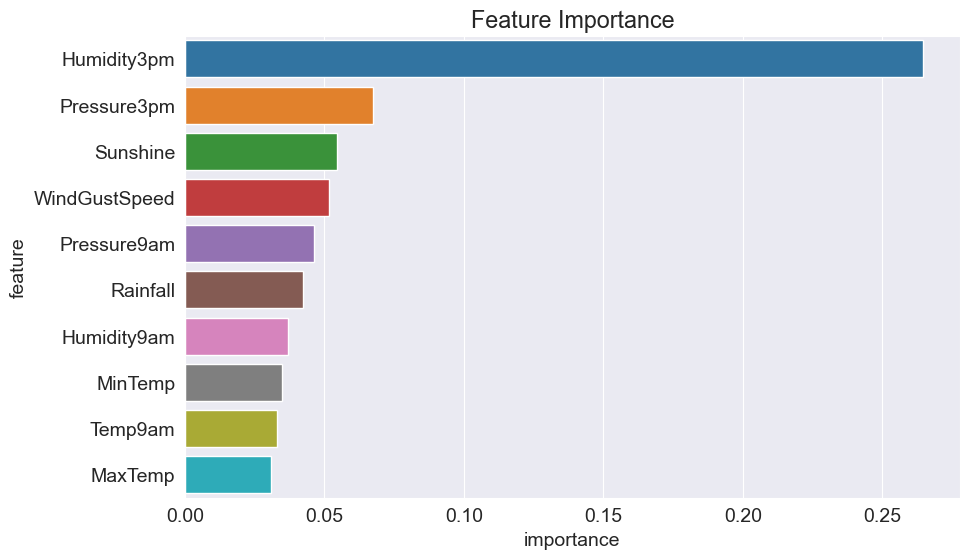

In [26]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. 


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`


### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [27]:
model = DecisionTreeClassifier(max_depth= 3, random_state= 42)

model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [28]:
print("Training Score: ", model.score(X_train, train_targets))
print("Validation Score: ", model.score(X_val, val_targets))

Training Score:  0.8338782182263996
Validation Score:  0.8470588235294118


Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [29]:
model.classes_

array(['No', 'Yes'], dtype=object)

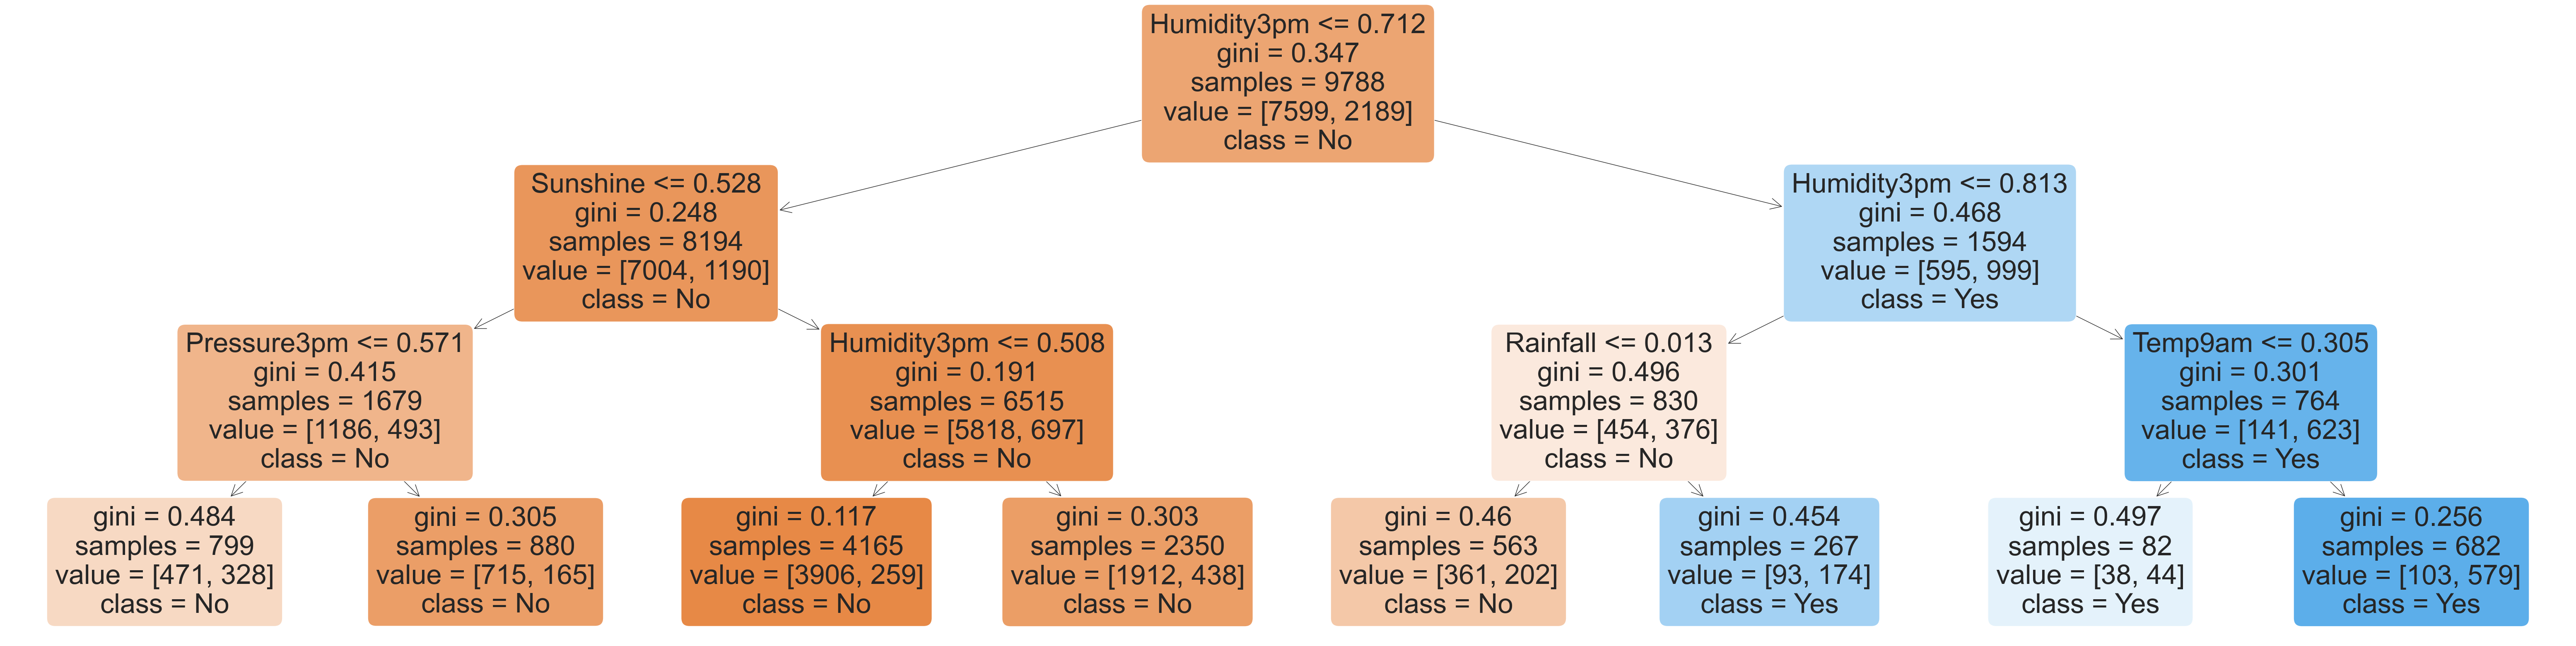

In [30]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [31]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.71
|   |--- Sunshine <= 0.53
|   |   |--- Pressure3pm <= 0.57
|   |   |   |--- class: No
|   |   |--- Pressure3pm >  0.57
|   |   |   |--- class: No
|   |--- Sunshine >  0.53
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.71
|   |--- Humidity3pm <= 0.81
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.81
|   |   |--- Temp9am <= 0.30
|   |   |   |--- class: Yes
|   |   |--- Temp9am >  0.30
|   |   |   |--- class: Yes



Let's experiment with different depths using a helper function.


In [39]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    validation_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 
            'Validation Error': validation_error}
    

In [40]:
error_df = pd.DataFrame([max_depth_error(md) for md in range (1,21)])

In [41]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.182366,0.168235
1,2,0.174397,0.156471
2,3,0.166122,0.152941
3,4,0.162239,0.159412
4,5,0.155190,0.154706
5,6,0.142113,0.159412
6,7,0.130159,0.155294
7,8,0.117184,0.158824
8,9,0.104618,0.164706
9,10,0.090928,0.165882


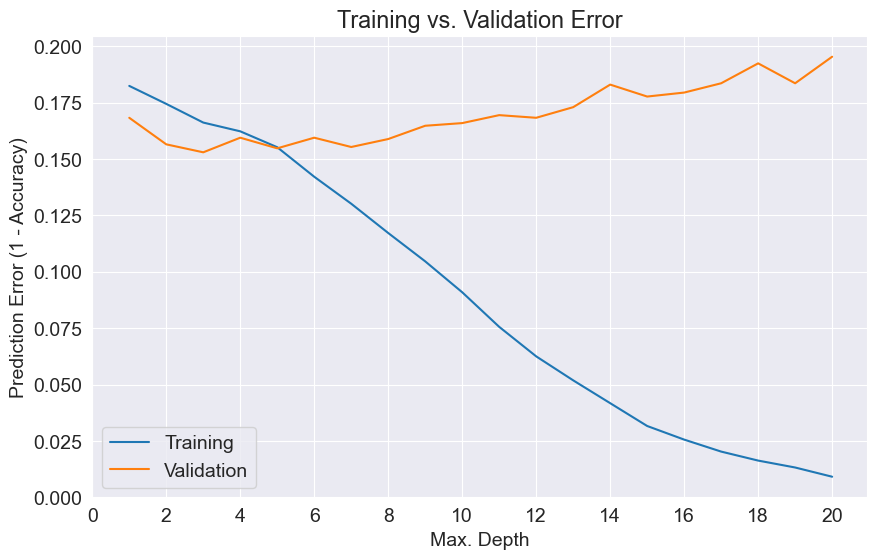

In [35]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 3 results in the lowest validation error.

In [42]:
model = DecisionTreeClassifier(max_depth=3, random_state= 42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8338782182263996, 0.8470588235294118)

In [43]:
model = DecisionTreeClassifier(max_depth=5, random_state= 42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8448099713935431, 0.8452941176470589)

In [44]:
model = DecisionTreeClassifier(max_depth=7, random_state= 42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8698406211687781, 0.8447058823529412)

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

max_leaf_nodes = 2^n

example, 2^7 = 128

In [45]:
model = DecisionTreeClassifier(max_leaf_nodes= 8, random_state= 42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)

In [47]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8338782182263996, 0.8470588235294118)

In [50]:
model.tree_.max_depth

4

Notice that the model was able to achieve a greater depth of 4 for certain paths while keeping other paths shorter.

In [53]:
model_text = export_text(model, feature_names= list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.71
|   |--- Sunshine <= 0.53
|   |   |--- Pressure3pm <= 0.57
|   |   |   |--- class: No
|   |   |--- Pressure3pm >  0.57
|   |   |   |--- class: No
|   |--- Sunshine >  0.53
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- WindGustSpeed <= 0.38
|   |   |   |   |--- class: No
|   |   |   |--- WindGustSpeed >  0.38
|   |   |   |   |--- class: No
|--- Humidity3pm >  0.71
|   |--- Humidity3pm <= 0.81
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.81
|   |   |--- class: Yes



Let's check the combination of `max_depth` and `max_leaf_nodes` that results in the highest validation accuracy.

In [54]:
model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state= 42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8338782182263996, 0.8470588235294118)

In [55]:
model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 128, random_state= 42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8698406211687781, 0.8435294117647059)

Explore and experiment with other arguments of `DecisionTree`. Refer to the docs for details: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Summary and References

The following topics were covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting & hyperparameter tuning
- Making predictions on single inputs



We also introduced the following terms:

* Decision tree
* Random forest
* Overfitting
* Hyperparameter
* Hyperparameter tuning
* Ensembling
* Generalization
* Bootstrapping


Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://www.kaggle.com/c/home-credit-default-risk/discussion/64821